# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


## Exercício: Análise Exploratória de Dados com Python

Neste exercício, você vai realizar uma análise exploratória em um dos mais famosos datasets para Machine Learning, o dataset iris com informações sobre 3 tipos de plantas. Esse dataset é comumente usado em problemas de Machine Learning de classificação, quando nosso objetivo é prever a classe dos dados. No caso deste dataset, prever a categoria de uma planta a partir de medidas da planta (sepal e petal).

Em cada célula, você encontra a tarefa a ser realizada. Faça todo o exercício e depois compare com a solução proposta.

Dataset (já disponível com o Scikit-Learn): https://archive.ics.uci.edu/ml/datasets/iris

In [2]:
# Imports
import time
import numpy as np
import pandas as pd
import matplotlib as mat
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [3]:
np.__version__

'1.21.0'

In [4]:
pd.__version__

'1.3.0'

In [5]:
mat.__version__

'3.4.2'

In [3]:
# Carregando o dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Extração e Transformação de Dados

In [5]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target
df['target_names'] = [iris.target_names[i] for i in iris.target]
df.target_names

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target_names, Length: 150, dtype: object

In [8]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df['target'] = iris.target
df.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [9]:
# Extraia as features (atributos) do dataset e imprima 
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'target_names', 'target'],
      dtype='object')

In [10]:
# Calcule a média de cada feature para as 3 classes
pd.pivot_table(data=df,index='target_names',values=['sepal_length','sepal_width','petal_length','petal_width'],
              aggfunc=np.mean)

,petal_length,petal_width,sepal_length,sepal_width
target_names,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


## Exploração de Dados

In [11]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)


In [12]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target_names  150 non-null    object 
 5   target        150 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [13]:
# Faça um resumo estatístico do dataset
df.describe(percentiles=[.25,.5,.75,.99])

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
99%,7.700000,4.151000,6.700000,2.500000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
# Verifique se existem valores nulos no dataset
df.isnull().value_counts()

sepal_length  sepal_width  petal_length  petal_width  target_names  target
False         False        False         False        False         False     150
dtype: int64

In [15]:
# Faça uma contagem de valores de sepal length
df.sepal_length.sum()

876.5

## Plot

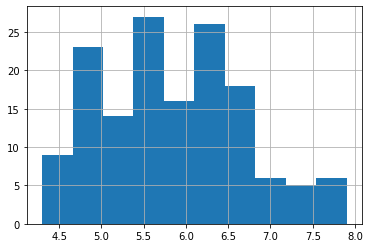

In [16]:
# Crie um Histograma de sepal length
df.sepal_length.hist()

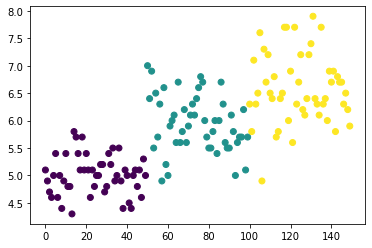

In [17]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target
plt.scatter(range(len(df)), df.sepal_length,c=df.target)

Text(0, 0.5, 'sepal_length')

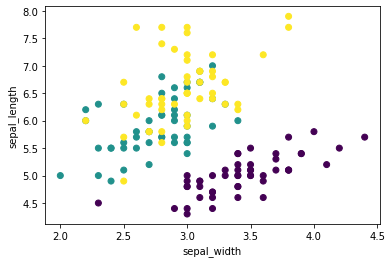

In [18]:
# Crie um Scatter Plot de 2 Features (atributos)
plt.figure()
plt.scatter(df.sepal_width, df.sepal_length,c=df.target)
plt.xlabel('sepal_width')
plt.ylabel('sepal_length')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A52B3B8640>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

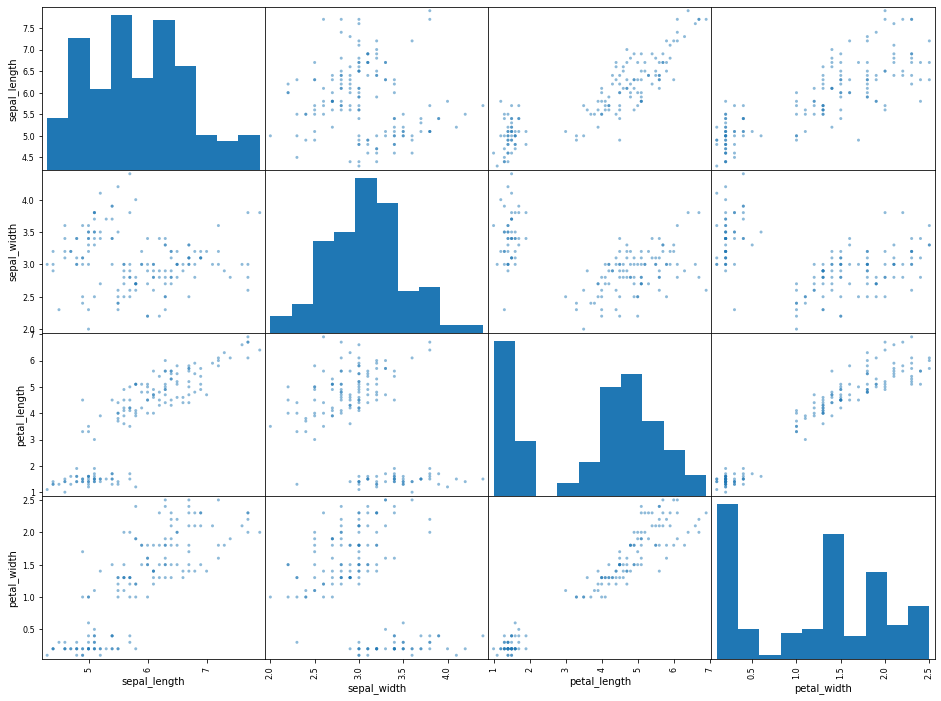

In [19]:
# Crie um Scatter Matrix das Features (atributos)
features_name = [n for n in df.columns if 'sepal' in n or 'petal' in n]

plt.figure()
pd.plotting.scatter_matrix(df[features_name], figsize=(16,12))

True

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DB23D9250>,
      dtype=object)

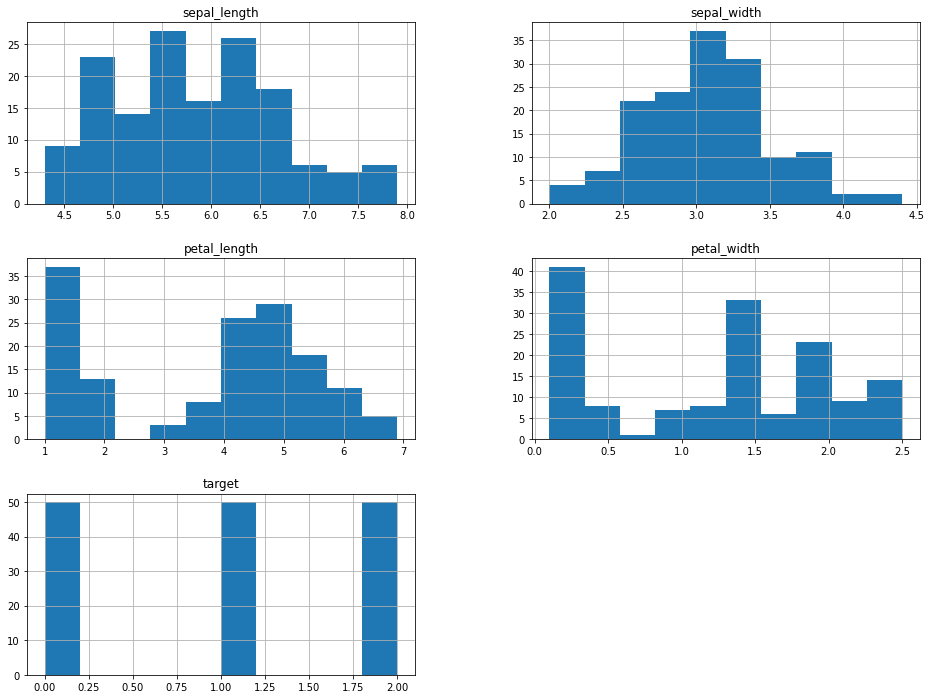

In [76]:
# Crie um Histograma de todas as features
df.hist(figsize=(16,12))

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>